In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
results_path = '/home/psachdeva/fits/uoineuro/classification/cv_ecog.h5'

In [3]:
results = h5py.File(results_path, 'r')

In [5]:
uoi_c_srs = results['c_unshared/uoi/srs'][:]
uoi_v_srs = results['v_unshared/uoi/srs'][:]
log_c_srs = results['c_unshared/logistic/srs'][:]
log_v_srs = results['v_unshared/logistic/srs'][:]

In [6]:
uoi_c_acc = results['c_unshared/uoi/scores'][:]
uoi_v_acc = results['v_unshared/uoi/scores'][:]
log_c_acc = results['c_unshared/logistic/scores'][:]
log_v_acc = results['v_unshared/logistic/scores'][:]

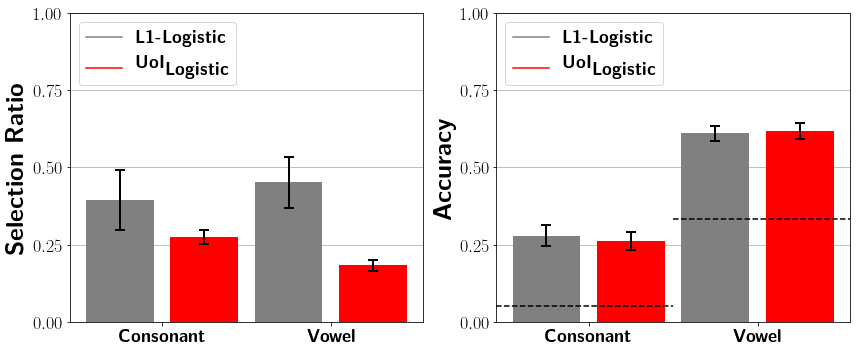

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# selection ratio plot
axes[0].bar(
    x=[0, 1, 2, 3],
    height=[np.mean(log_c_srs), np.mean(uoi_c_srs), np.mean(log_v_srs), np.mean(uoi_v_srs)],
    width=0.8,
    color=['gray', 'red', 'gray', 'red'],
    yerr=[np.std(log_c_srs), np.std(uoi_c_srs), np.std(log_v_srs), np.std(uoi_v_srs)],
    error_kw={'capsize': 5, 'elinewidth': 2, 'capthick': 2}
)

# accuracy plot
axes[1].bar(
    x=[0, 1, 2, 3],
    height=[np.mean(log_c_acc), np.mean(uoi_c_acc), np.mean(log_v_acc), np.mean(uoi_v_acc)],
    width=0.8,
    color=['gray', 'red', 'gray', 'red'],
    yerr=[np.std(log_c_acc), np.std(uoi_c_acc), np.std(log_v_acc), np.std(uoi_v_acc)],
    error_kw={'capsize': 5, 'elinewidth': 2, 'capthick': 2}
)

# chance
axes[1].axhline(y=1./19, xmin=0, xmax=0.5, linestyle='--', color='k')
axes[1].axhline(y=1./3, xmin=0.5, xmax=1, linestyle='--', color='k')

# plot labels
axes[0].set_ylabel(r'\textbf{Selection Ratio}', fontsize=25)
axes[1].set_ylabel(r'\textbf{Accuracy}', fontsize=25)

# cosmetic + legend
for ax in axes:
    # limits
    ax.set_ylim([0, 1])
    
    # ticks
    ax.set_xticks([0.5, 2.5])
    ax.set_xticklabels([r'\textbf{Consonant}', r'\textbf{Vowel}'], fontsize=18)
    ax.set_yticks([0, 0.25, 0.50, 0.75, 1.])
    
    # legend labels
    ax.plot([], color='gray', label=r'\textbf{L1-Logistic}')
    ax.plot([], color='r', label=r'\textbf{UoI}$_{\textbf{Logistic}}$')
    ax.legend(loc=2, prop={'size': 18})

    # gridlines
    ax.grid('on', axis='y')
    ax.set_axisbelow(True)
    
    ax.tick_params(labelsize=18)

plt.tight_layout()

In [ ]:
results.close()